In [81]:
# Install chord diagram library
import sys
!{sys.executable} -m pip install mpl-chord-diagram

In [82]:
# Install plotly for chord diagrams
import sys
!{sys.executable} -m pip install plotly

In [83]:
import sys
!{sys.executable} -m pip install --upgrade comtradeapicall
!{sys.executable} -m pip install pandas

In [84]:
import pandas
import requests
import comtradeapicall
from datetime import date
from datetime import timedelta

In [ ]:
subscription_key = ''
directory = '<OUTPUT DIR>' 

In [86]:
today = date.today()
yesterday = today - timedelta(days=1)
lastweek = today - timedelta(days=7)

In [87]:
mydf = comtradeapicall.previewFinalData(typeCode='C', freqCode='M', clCode='HS', period='202205',
                                        reporterCode='36', cmdCode='91', flowCode='M', partnerCode=None,
                                        partner2Code=None,
                                        customsCode=None, motCode=None, maxRecords=500, format_output='JSON',
                                        aggregateBy=None, breakdownMode='classic', countOnly=None, includeDesc=True)

In [88]:
mydf.columns.tolist()

['typeCode',
 'freqCode',
 'refPeriodId',
 'refYear',
 'refMonth',
 'period',
 'reporterCode',
 'reporterISO',
 'reporterDesc',
 'flowCode',
 'flowDesc',
 'partnerCode',
 'partnerISO',
 'partnerDesc',
 'partner2Code',
 'partner2ISO',
 'partner2Desc',
 'classificationCode',
 'classificationSearchCode',
 'isOriginalClassification',
 'cmdCode',
 'cmdDesc',
 'aggrLevel',
 'isLeaf',
 'customsCode',
 'customsDesc',
 'mosCode',
 'motCode',
 'motDesc',
 'qtyUnitCode',
 'qtyUnitAbbr',
 'qty',
 'isQtyEstimated',
 'altQtyUnitCode',
 'altQtyUnitAbbr',
 'altQty',
 'isAltQtyEstimated',
 'netWgt',
 'isNetWgtEstimated',
 'grossWgt',
 'isGrossWgtEstimated',
 'cifvalue',
 'fobvalue',
 'primaryValue',
 'legacyEstimationFlag',
 'isReported',
 'isAggregate']

In [89]:
# Get full data using API key - Germany exports 2024
germany_exports = comtradeapicall.getFinalData(
    subscription_key=subscription_key,
    typeCode='C',           # Goods
    freqCode='A',           # Annual
    clCode='HS',            # Harmonized System
    period='2024',          # Year 2024
    reporterCode='276',     # Germany
    cmdCode='TOTAL',        # All commodities
    flowCode='X',           # Exports
    partnerCode=None,       # All partners
    partner2Code=None,
    customsCode=None,
    motCode=None,
    maxRecords=250000,      # Increased limit with API key
    format_output='JSON',
    aggregateBy=None,
    breakdownMode='classic',
    countOnly=None,
    includeDesc=True
)

In [90]:
# Display the Germany exports data
germany_exports

typeCode freqCode  refPeriodId  refYear  refMonth period  reporterCode  \
0          C        A     20240101     2024        52   2024           276   
1          C        A     20240101     2024        52   2024           276   
2          C        A     20240101     2024        52   2024           276   
3          C        A     20240101     2024        52   2024           276   
4          C        A     20240101     2024        52   2024           276   
..       ...      ...          ...      ...       ...    ...           ...   
224        C        A     20240101     2024        52   2024           276   
225        C        A     20240101     2024        52   2024           276   
226        C        A     20240101     2024        52   2024           276   
227        C        A     20240101     2024        52   2024           276   
228        C        A     20240101     2024        52   2024           276   

    reporterISO reporterDesc flowCode  ... netWgt  isNetWgtEstimated grossWgt  \
0           DEU      Germany        X  ...    NaN              False      0.0   
1           DEU      Germany        X  ...    0.0               True      0.0   
2           DEU      Germany        X  ...    0.0               True      0.0   
3           DEU      Germany        X  ...    0.0              False      0.0   
4           DEU      Germany        X  ...    0.0               True      0.0   
..          ...          ...      ...  ...    ...                ...      ...   
224         DEU      Germany        X  ...    0.0              False      0.0   
225         DEU      Germany        X  ...    0.0               True      0.0   
226         DEU      Germany        X  ...    0.0               True      0.0   
227         DEU      Germany        X  ...    0.0               True      0.0   
228         DEU      Germany        X  ...    0.0               True      0.0   

    isGrossWgtEstimated  cifvalue      fobvalue  primaryValue  \
0                 False      None  1.683517e+12  1.683517e+12   
1                 False      None  7.358738e+07  7.358738e+07   
2                 False      None  5.033428e+08  5.033428e+08   
3                 False      None  7.389563e+05  7.389563e+05   
4                 False      None  2.386040e+09  2.386040e+09   
..                  ...       ...           ...           ...   
224               False      None  3.046490e+05  3.046490e+05   
225               False      None  9.067840e+06  9.067840e+06   
226               False      None  1.098505e+08  1.098505e+08   
227               False      None  1.053579e+08  1.053579e+08   
228               False      None  4.560540e+06  4.560540e+06   

    legacyEstimationFlag isReported  isAggregate  
0                      0      False         True  
1                      4      False         True  
2                      4      False         True  
3                      0      False         True  
4                      4      False         True  
..                   ...        ...          ...  
224                    0      False         True  
225                    4      False         True  
226                    4      False         True  
227                    4      False         True  
228                    4      False         True  

[229 rows x 47 columns]

In [91]:
# Export Germany exports data to CSV
germany_exports.to_csv('germany_exports_2024.csv', index=False)
print("Data exported to germany_exports_2024.csv")

Data exported to germany_exports_2024.csv


In [92]:
# Get USA exports data for 2024
usa_exports = comtradeapicall.getFinalData(
    subscription_key=subscription_key,
    typeCode='C',           # Goods
    freqCode='A',           # Annual
    clCode='HS',            # Harmonized System
    period='2024',          # Year 2024
    reporterCode='842',     # USA
    cmdCode='TOTAL',        # All commodities
    flowCode='X',           # Exports
    partnerCode=None,       # All partners
    partner2Code=None,
    customsCode=None,
    motCode=None,
    maxRecords=250000,
    format_output='JSON',
    aggregateBy=None,
    breakdownMode='classic',
    countOnly=None,
    includeDesc=True
)

In [93]:
# Get China exports data for 2024
china_exports = comtradeapicall.getFinalData(
    subscription_key=subscription_key,
    typeCode='C',           # Goods
    freqCode='A',           # Annual
    clCode='HS',            # Harmonized System
    period='2024',          # Year 2024
    reporterCode='156',     # China
    cmdCode='TOTAL',        # All commodities
    flowCode='X',           # Exports
    partnerCode=None,       # All partners
    partner2Code=None,
    customsCode=None,
    motCode=None,
    maxRecords=250000,
    format_output='JSON',
    aggregateBy=None,
    breakdownMode='classic',
    countOnly=None,
    includeDesc=True
)

In [95]:
# Filter trade data between Germany (276), USA (842), and China (156)
import numpy as np

# Country codes mapping
countries = {
    'Germany': '276',
    'USA': '842', 
    'China': '156'
}

# Extract bilateral trade flows
trade_flows = []

# Germany to USA and China
germany_to_usa = germany_exports[germany_exports['partnerCode'] == 842]['primaryValue'].sum() if len(germany_exports[germany_exports['partnerCode'] == 842]) > 0 else 0
germany_to_china = germany_exports[germany_exports['partnerCode'] == 156]['primaryValue'].sum() if len(germany_exports[germany_exports['partnerCode'] == 156]) > 0 else 0

# USA to Germany and China  
usa_to_germany = usa_exports[usa_exports['partnerCode'] == 276]['primaryValue'].sum() if len(usa_exports[usa_exports['partnerCode'] == 276]) > 0 else 0
usa_to_china = usa_exports[usa_exports['partnerCode'] == 156]['primaryValue'].sum() if len(usa_exports[usa_exports['partnerCode'] == 156]) > 0 else 0

# China to Germany and USA
china_to_germany = china_exports[china_exports['partnerCode'] == 276]['primaryValue'].sum() if len(china_exports[china_exports['partnerCode'] == 276]) > 0 else 0
china_to_usa = china_exports[china_exports['partnerCode'] == 842]['primaryValue'].sum() if len(china_exports[china_exports['partnerCode'] == 842]) > 0 else 0

# Create trade flow matrix
trade_matrix = {
    'Germany_to_USA': germany_to_usa,
    'Germany_to_China': germany_to_china,
    'USA_to_Germany': usa_to_germany,
    'USA_to_China': usa_to_china,
    'China_to_Germany': china_to_germany,
    'China_to_USA': china_to_usa
}

print("Trade flows (in USD):")
for flow, value in trade_matrix.items():
    print(f"{flow}: ${value:,.0f}")

Trade flows (in USD):
Germany_to_USA: $175,528,388,461
Germany_to_China: $97,733,536,224
USA_to_Germany: $75,381,806,630
USA_to_China: $143,545,716,168
China_to_Germany: $107,059,114,975
China_to_USA: $525,648,764,497


In [96]:
# Install required packages for network visualization
import sys
!{sys.executable} -m pip install matplotlib networkx

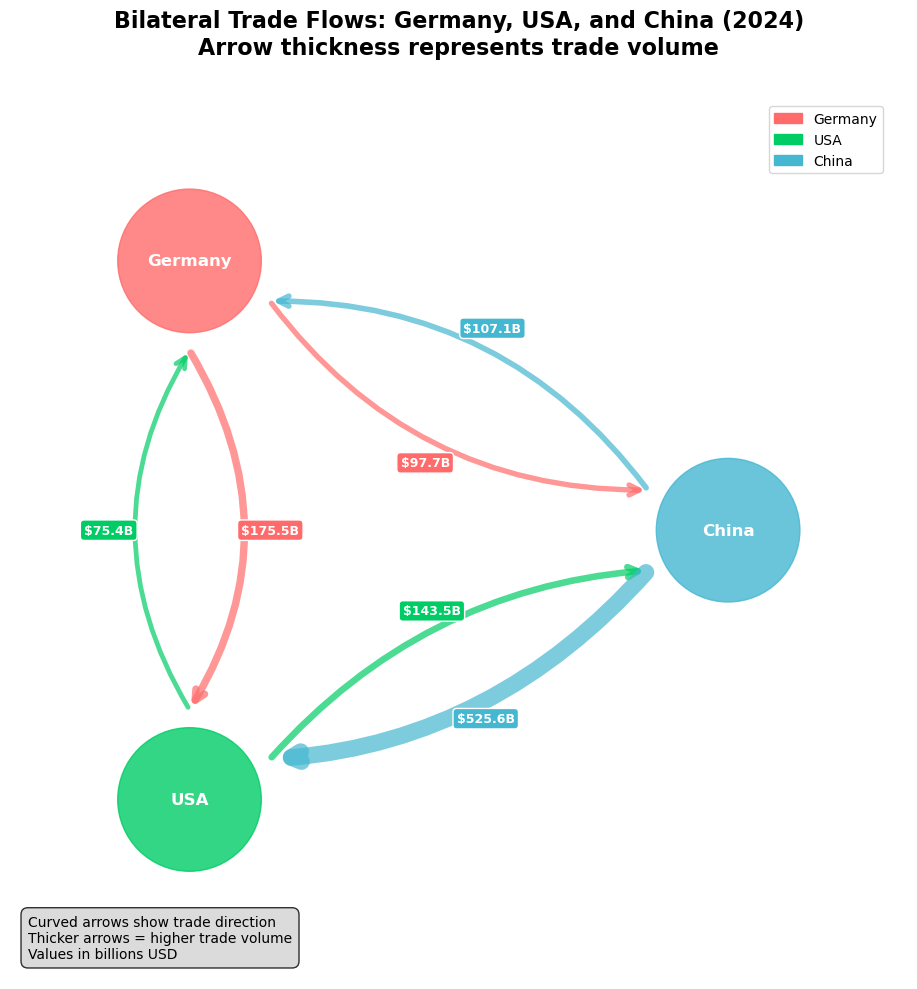

Trade Flow Summary (Billions USD):
Germany → USA: $175.5B
USA → Germany: $75.4B
Germany → China: $97.7B
China → Germany: $107.1B
USA → China: $143.5B
China → USA: $525.6B


In [107]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch, Circle
import matplotlib.patches as mpatches

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Define country positions (forming a triangle)
positions = {
    'Germany': (0.2, 0.8),
    'USA': (0.2, 0.2),
    'China': (0.8, 0.5)
}

# Define colors for each country
colors = {
    'Germany': '#FF6B6B',  # Red
    'USA': '#00CC66',      # Bright Green  
    'China': '#45B7D1'     # Blue
}

# Draw country circles
circle_radius = 0.08
for country, (x, y) in positions.items():
    circle = Circle((x, y), circle_radius, color=colors[country], alpha=0.8, zorder=3)
    ax.add_patch(circle)
    ax.text(x, y, country, ha='center', va='center', fontsize=12, fontweight='bold', 
            color='white', zorder=4)

# Normalize trade flows for arrow widths
max_trade = max(trade_matrix.values())
min_width = 2
max_width = 12

def get_arrow_width(value):
    return min_width + (max_width - min_width) * (value / max_trade)

# Function to create curved arrow and calculate the exact center of the curve
def create_curved_arrow_with_label_pos(start_pos, end_pos, trade_value, curve_offset=0.15, color='darkgray'):
    x1, y1 = start_pos
    x2, y2 = end_pos
    
    # Calculate direction vector and normalize
    dx = x2 - x1
    dy = y2 - y1
    distance = np.sqrt(dx**2 + dy**2)
    
    # Adjust start and end points to circle edges
    edge_offset = circle_radius + 0.02
    start_x = x1 + (dx/distance) * edge_offset
    start_y = y1 + (dy/distance) * edge_offset
    end_x = x2 - (dx/distance) * edge_offset
    end_y = y2 - (dy/distance) * edge_offset
    
    # Create the curved arrow
    arrow = FancyArrowPatch((start_x, start_y), (end_x, end_y),
                           connectionstyle=f"arc3,rad={curve_offset}",
                           arrowstyle='->', 
                           mutation_scale=18,
                           linewidth=get_arrow_width(trade_value),
                           color=color,
                           alpha=0.7,
                           zorder=2)
    
    # Calculate the midpoint of the straight line between arrow endpoints
    mid_x = (start_x + end_x) / 2
    mid_y = (start_y + end_y) / 2
    
    # Calculate perpendicular direction for the curve
    perp_x = -dy / distance
    perp_y = dx / distance
    
    # Calculate the center of the curved path (where the label should go)
    # This uses the same math as matplotlib's arc3 connectionstyle
    label_x = mid_x + perp_x * curve_offset * distance * 0.5
    label_y = mid_y + perp_y * curve_offset * distance * 0.5
    
    return arrow, (label_x, label_y)

# Create all arrows with different offsets to prevent overlap
arrows_and_labels = []

# Germany ↔ USA - store label positions separately
germany_usa_arrow, germany_usa_label_pos = create_curved_arrow_with_label_pos(positions['Germany'], positions['USA'], 
                                                     trade_matrix['Germany_to_USA'], 
                                                     curve_offset=-0.3, color=colors['Germany'])
ax.add_patch(germany_usa_arrow)

usa_germany_arrow, usa_germany_label_pos = create_curved_arrow_with_label_pos(positions['USA'], positions['Germany'], 
                                                     trade_matrix['USA_to_Germany'], 
                                                     curve_offset=-0.3, color=colors['USA'])
ax.add_patch(usa_germany_arrow)

# Add labels on opposite arrows
arrows_and_labels.append((usa_germany_label_pos, f"${trade_matrix['Germany_to_USA']/1e9:.1f}B", colors['Germany']))
arrows_and_labels.append((germany_usa_label_pos, f"${trade_matrix['USA_to_Germany']/1e9:.1f}B", colors['USA']))

# Germany ↔ China - store label positions separately
germany_china_arrow, germany_china_label_pos = create_curved_arrow_with_label_pos(positions['Germany'], positions['China'], 
                                                         trade_matrix['Germany_to_China'], 
                                                         curve_offset=0.25, color=colors['Germany'])
ax.add_patch(germany_china_arrow)

china_germany_arrow, china_germany_label_pos = create_curved_arrow_with_label_pos(positions['China'], positions['Germany'], 
                                                         trade_matrix['China_to_Germany'], 
                                                         curve_offset=0.25, color=colors['China'])
ax.add_patch(china_germany_arrow)

# Add labels on opposite arrows
arrows_and_labels.append((china_germany_label_pos, f"${trade_matrix['Germany_to_China']/1e9:.1f}B", colors['Germany']))
arrows_and_labels.append((germany_china_label_pos, f"${trade_matrix['China_to_Germany']/1e9:.1f}B", colors['China']))

# USA ↔ China - store label positions separately
usa_china_arrow, usa_china_label_pos = create_curved_arrow_with_label_pos(positions['USA'], positions['China'], 
                                                     trade_matrix['USA_to_China'], 
                                                     curve_offset=-0.2, color=colors['USA'])
ax.add_patch(usa_china_arrow)

china_usa_arrow, china_usa_label_pos = create_curved_arrow_with_label_pos(positions['China'], positions['USA'], 
                                                     trade_matrix['China_to_USA'], 
                                                     curve_offset=-0.2, color=colors['China'])
ax.add_patch(china_usa_arrow)

# Add labels on opposite arrows
arrows_and_labels.append((china_usa_label_pos, f"${trade_matrix['USA_to_China']/1e9:.1f}B", colors['USA']))
arrows_and_labels.append((usa_china_label_pos, f"${trade_matrix['China_to_USA']/1e9:.1f}B", colors['China']))

# Add labels at the calculated positions
for (x, y), label, bg_color in arrows_and_labels:
    ax.text(x, y, label, ha='center', va='center', fontsize=9, fontweight='bold',
            color='white',
            bbox=dict(boxstyle="round,pad=0.3", facecolor=bg_color, alpha=1.0, edgecolor='white'),
            zorder=5)

# Set axis properties
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')

# Add title
plt.title('Bilateral Trade Flows: Germany, USA, and China (2024)\nArrow thickness represents trade volume', 
          fontsize=16, fontweight='bold', pad=20)

# Create legend for countries
legend_elements = [mpatches.Patch(color=colors[country], label=country) 
                  for country in ['Germany', 'USA', 'China']]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# Add explanation
ax.text(0.02, 0.02, 'Curved arrows show trade direction\nThicker arrows = higher trade volume\nValues in billions USD', 
        fontsize=10, ha='left', va='bottom', 
        bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# Print trade summary
print("Trade Flow Summary (Billions USD):")
print("="*50)
print(f"Germany → USA: ${trade_matrix['Germany_to_USA']/1e9:.1f}B")
print(f"USA → Germany: ${trade_matrix['USA_to_Germany']/1e9:.1f}B")
print(f"Germany → China: ${trade_matrix['Germany_to_China']/1e9:.1f}B") 
print(f"China → Germany: ${trade_matrix['China_to_Germany']/1e9:.1f}B")
print(f"USA → China: ${trade_matrix['USA_to_China']/1e9:.1f}B")
print(f"China → USA: ${trade_matrix['China_to_USA']/1e9:.1f}B")